In [1]:
import sympy as sy
import numpy as np
from math import *
from matplotlib import pyplot as plt

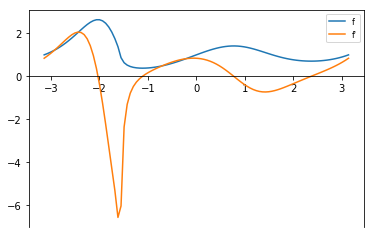

In [2]:
# Problem 1

x = sy.symbols('x')
Problem1solver = (sy.sin(x)+1)**sy.sin(sy.cos(x))
diff_expr = sy.diff(Problem1solver,x)
Problem1solver = sy.lambdify(x,Problem1solver,'numpy')
f_prime = sy.lambdify(x,diff_expr,'numpy')
x = np.linspace(-pi, pi, 100)
y = Problem1solver(x)
y_prime = f_prime(x)

plt.plot(x, y, label = "f")
plt.plot(x, y_prime, label = "f'")
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.legend(loc = 'upper right',prop = {'size': 8})

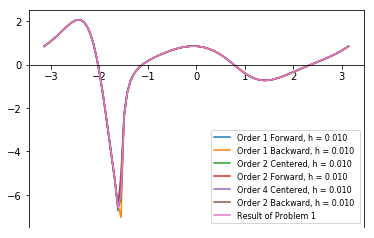

In [3]:
# Problem 2

f = lambda x: (sin(x)+1)**sin(cos(x))
f_prime_forward1 = lambda x_0,h: (f(x_0+h)-f(x_0))/h
f_prime_forward2 = lambda x_0,h: (-3*f(x_0)+4*f(x_0+h)-f(x_0+2*h))/(2*h)
f_prime_backward1 = lambda x_0,h: (f(x_0)-f(x_0-h))/h
f_prime_backward2 = lambda x_0,h: (3*f(x_0)-4*f(x_0-h)+f(x_0-2*h))/(2*h)
f_prime_centered1 = lambda x_0,h: (f(x_0+h)-f(x_0-h))/(2*h)
f_prime_centered2 = lambda x_0,h: (f(x_0-2*h)-8*f(x_0-h)+8*f(x_0+h)-f(x_0+2*h))/(12*h)

derivative_dict = {"Order 1 Forward":f_prime_forward1,
                   "Order 2 Forward":f_prime_forward2,
                   "Order 1 Backward":f_prime_backward1,
                   "Order 2 Backward":f_prime_backward2,
                   "Order 2 Centered":f_prime_centered1,
                   "Order 4 Centered":f_prime_centered2}


def Problem2solver(handle_f,x,h):
    thefunction = derivative_dict[handle_f]
    return thefunction(x,h)


def plot_derivative(handle_f, h, n = 100):
    x = np.linspace(-pi, pi, n)
    y = [Problem2solver(handle_f,elem,h) for elem in x]
    plt.plot(x, y, label = handle_f+", h = %-6.3f" %h)
    ax = plt.gca()
    ax.spines["bottom"].set_position("zero")

h = 0.01
for handle in derivative_dict:
    plot_derivative(handle,h)

plt.plot(x, y_prime, label = "Result of Problem 1")
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.legend(loc = 'lower right',prop = {'size': 8})

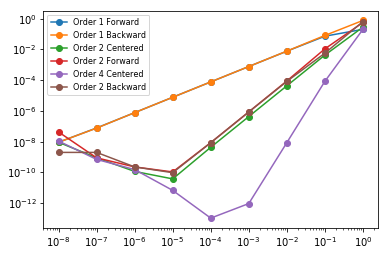

In [4]:
# Problem 3
hs = np.logspace(-8,0,9)
x0 = 1

def plot_error(handle_f, h):
    thefunction = derivative_dict[handle_f]
    y0 = f_prime(x0)
    err = [abs(thefunction(x0,elem)-y0) for elem in h]
    plt.loglog(h, err, marker='o', label = handle_f)
    ax = plt.gca()

for handle in derivative_dict:
    plot_error(handle,hs)
plt.legend(loc = 'upper left',prop = {'size': 8})

In [5]:
# Problem 4
test = np.load('plane.npy',encoding = "latin1")
l = list()
for elem in test:
    alpha = np.deg2rad(elem[1])
    beta = np.deg2rad(elem[2])
    x = 500*tan(beta)/(tan(beta)-tan(alpha))
    y = 500*tan(beta)*tan(alpha)/(tan(beta)-tan(alpha))
    l.append([elem[0],x,y])

l2 = list()
for t in range(len(l)-2):
    vx = (l[t+2][1]-l[t][1])/2
    vy = (l[t+2][2]-l[t][2])/2
    v = sqrt(vx**2+vy**2)
    l2.append([t+8,v])
print(l2)

[[8, 47.00103938095283], [9, 48.99880514036766], [10, 50.09944162965303], [11, 48.290350838205164], [12, 51.56455904927243], [13, 53.923033545053535]]


In [21]:
# Problem 5
def Problem5solver(f,x0,h):
    n = len(x0)
    hej = h*np.identity(n)
    l = list()
    for j in range(n):
        l.append((f(x0+hej[j])-f(x0-hej[j]))/(2*h))
    return np.array(l).transpose()

# f(x,y) = [x**2,x**3-y]^T
def ff(x):
    return np.array([x[0]**2,x[0]**3-x[1]])

print(Problem5solver(ff,np.array([1,1]),0.01))
#The result is the same as what I have calculated by scratch work.

[[ 2.      0.    ]
 [ 3.0001 -1.    ]]


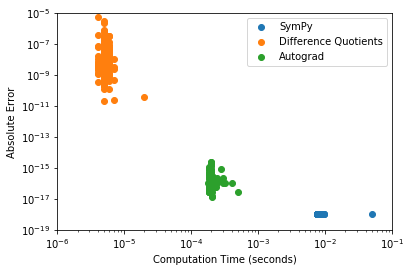

In [20]:
# Problem 7
from autograd import numpy as anp
from autograd import grad
import time

g = lambda x: (anp.sin(x)+1)**(anp.sin(anp.cos(x)))
dg = grad(g)

def Problem7solver(N):
    T1,T2,T3 = [],[],[]
    error1,error2 = [],[]
    for i in range(N):
        x0 = np.random.uniform(-pi,pi)
        # Sympy
        t0 = time.clock()
        x = sy.symbols('x')
        Problem1solver = (sy.sin(x)+1)**sy.sin(sy.cos(x))
        diff_expr = sy.diff(Problem1solver,x)
        Problem1solver = sy.lambdify(x,Problem1solver,'numpy')
        f_prime_sympy = sy.lambdify(x,diff_expr,'numpy')
        y0 = f_prime_sympy(x0)
        t1 = time.clock()
        T1.append(t1-t0)
        # Difference Quotients
        t2 = time.clock()
        y1 = Problem2solver("Order 4 Centered",x0,h)
        t3 = time.clock()
        T2.append(t3-t2)
        error1.append(abs(y1-y0))
        # Autograd
        t4 = time.clock()
        y2 = dg(x0)
        t5 = time.clock()
        T3.append(t5-t4)
        error2.append(abs(y2-y0))
    plt.scatter(np.array(T1),np.array([1e-18] * N),label="SymPy")
    plt.scatter(np.array(T2),np.array(error1),label="Difference Quotients")
    plt.scatter(np.array(T3),np.array(error2),label="Autograd")
    plt.legend(loc='upper right')
    plt.xlabel("Computation Time (seconds)")
    plt.ylabel("Absolute Error")
    plt.xlim(10**-6,10**-1)
    plt.ylim(10**-19,10**-5)
    plt.loglog()

Problem7solver(200)